# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Line, Circle and Blob Detection</h2>

<h5 style="margin-top:5px;">In this lesson we'll learn:</h5>

<p style="margin-top:0;">
1️⃣ Houghlines <br>
2️⃣ Probabilistic Houghlines <br>
3️⃣ Hough Circles <br>
4️⃣ Blob Detection <br>
</p>

In [1]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Line Detection - Using Hough Lines** ###
#### cv2.HoughLines(binarized/threshold image, rho accuracy, theta accuracy, threshold) ####


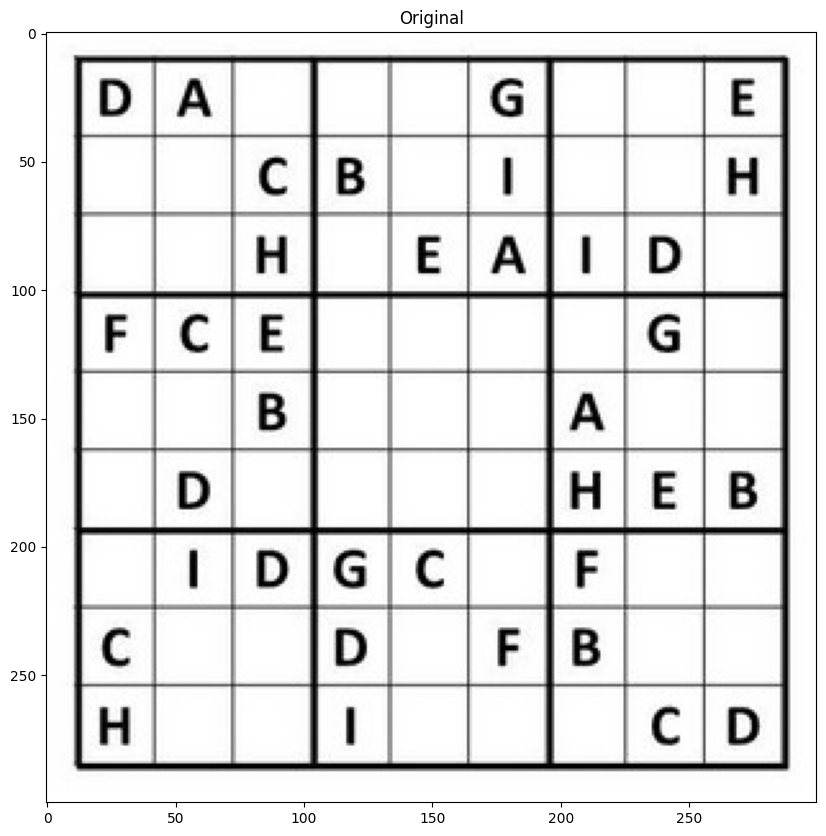

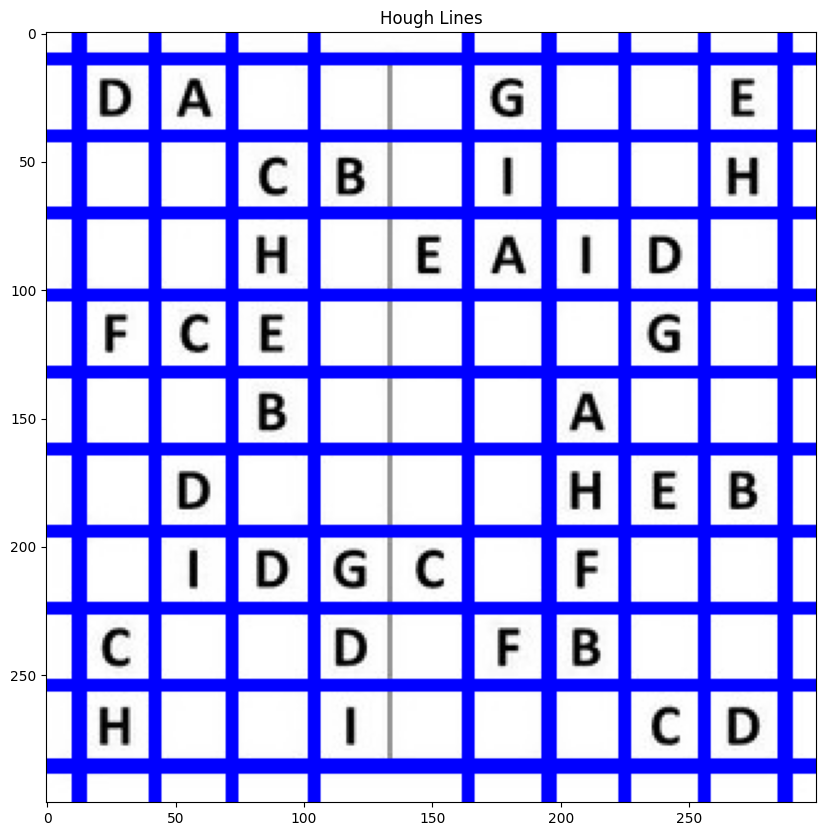

In [4]:
image = cv2.imread("../images/sudoku.png")
imshow("Original", image)

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Run Houghlines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)

# We iterate through each line and convert it to the format
# required by cv2.lines (i.e., requiring end points)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

imshow("Hough Lines", image)

### **Probabilistic Hough Lines** ###
#### cv2.HoughLines(binarized image, rho accuracy, theta accuracy, threshold, minimum line length, max line gap) ####

(107, 1, 4)


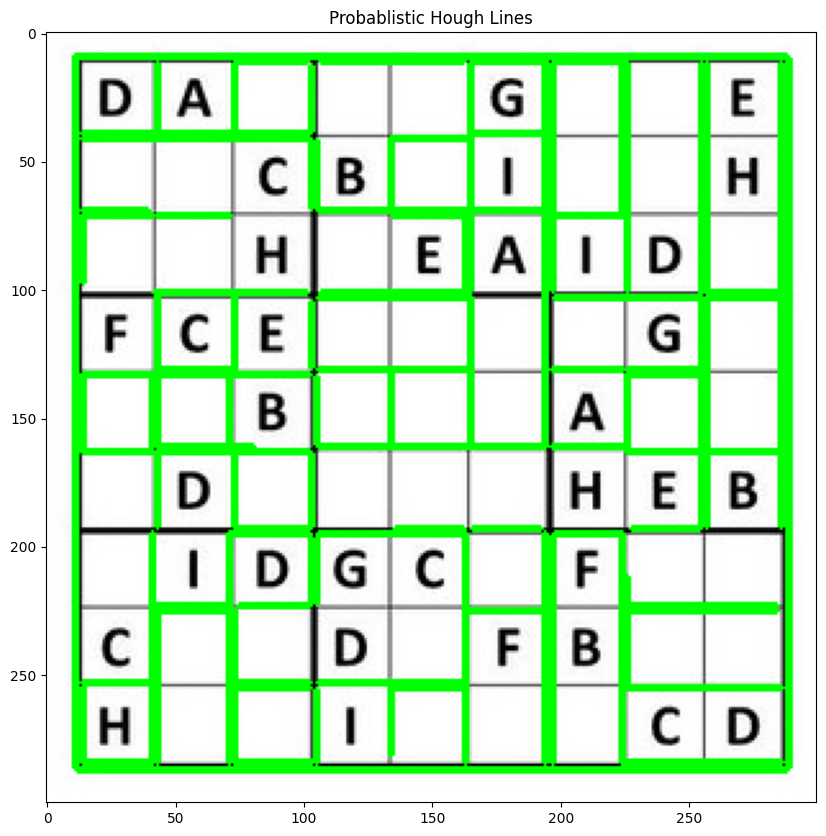

In [5]:
# Grayscale and Canny Edges extracted
image = cv2.imread("../images/sudoku.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Again we use the same rho and theta accuracies
# However, we specifiy a minimum vote (pts along line) of 100
# and Min line length of 3 pixels and max gap between lines of 25 pixels
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, 3, 25)
print(lines.shape)

for x in range(0, len(lines)):
    for x1, y1, x2, y2 in lines[x]:
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

imshow("Probablistic Hough Lines", image)

### **Circle Detection - Hough Circles** ###
#### **cv2.HoughCircles**(image, method, dp, MinDist, param1, param2, minRadius, maxRadius) ####

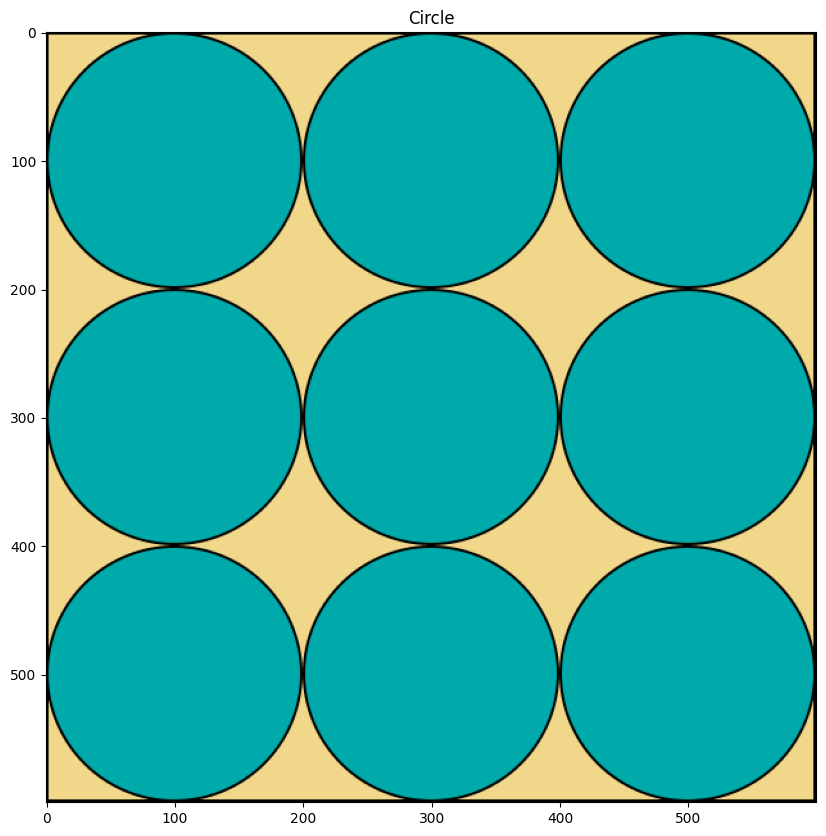

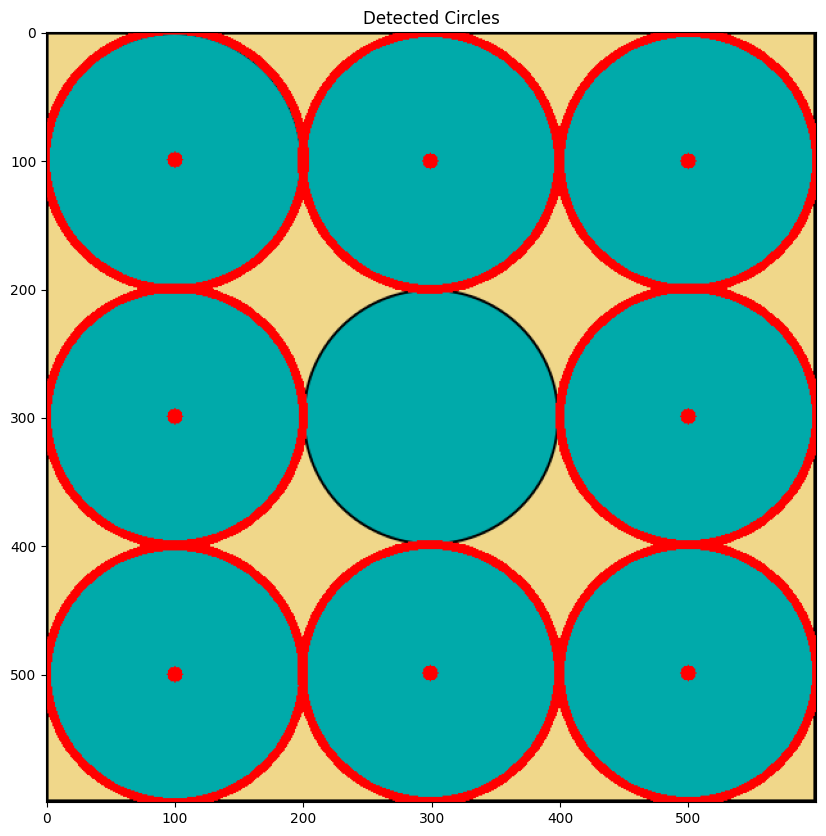

In [16]:
image = cv2.imread("../images/Circles_Packed_in_Square_9.png")
imshow("Circle", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 25)

circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    # draw the outer circle
    cv2.circle(image, (i[0], i[1]), i[2], (0, 0, 255), 5)

    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 8)

imshow("Detected Circles", image)

### **Blob Detection** ###
#### **cv2.drawKeypoints**(input image, keypoints, blank_output_array, color, flags)  ####

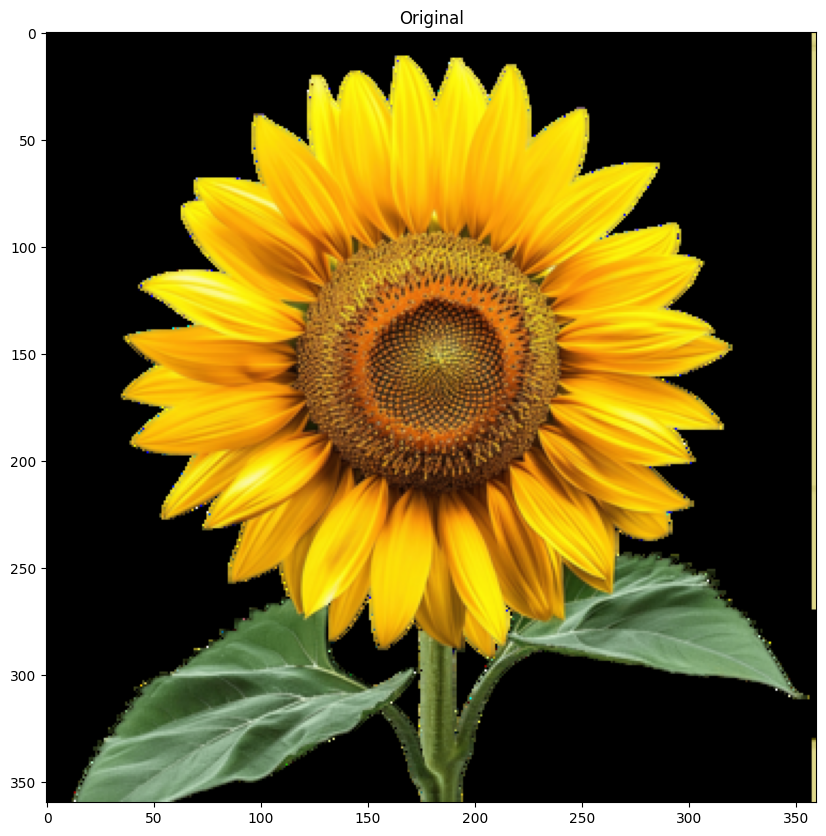

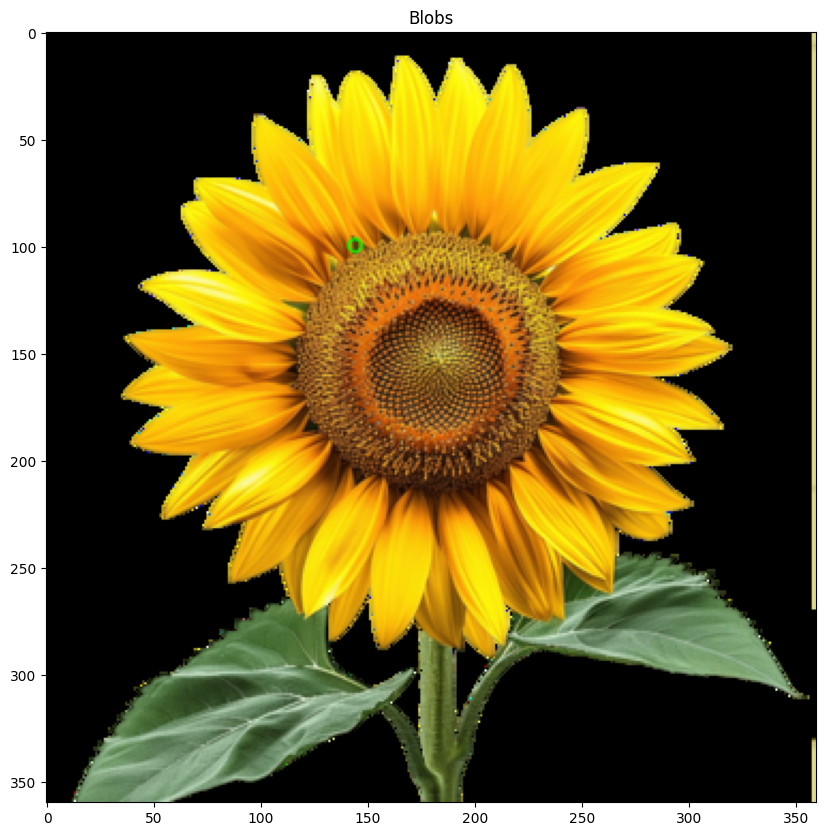

In [19]:
# Read image
image = cv2.imread("../images/sunflower.png")
imshow("Original", image)

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()

# Detect blobs
keypoints = detector.detect(image)

# Draw detected blobs as red circles
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of the blob
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DEFAULT)

# Show keypoints
imshow("Blobs", blobs)